# Tutorial on Differential Power Analysis

In [1]:
# -*- coding: utf-8 -*-

"""

----------------------------------------------------

Author : Sunghyun Jin (sunghyunjin@korea.ac.kr)

Cryptographic Algorithm Lab.
School of Cyber Security,
Center for Information Security Technologies (CIST),
Institute of Cyber Security & Privacy (ICSP),
Korea University,
Republic of Korea

----------------------------------------------------

"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import struct
#import time

import numpy as np
import matplotlib.pyplot as plt
import tqdm

## Load data

In [2]:
# load plaintext
f = open('plaintext1.txt')
tmp = f.readlines()
f.close()

pt = np.array([int(tmp[0][i:i+2], 16) for i in range(0,len(tmp[0])-1,2)], dtype = np.uint8)
print('1st plaintext  :', ''.join([i[2:].upper() for i in map(hex, pt)]))

# load ciphertext
f = open('ciphertext.txt')
tmp = f.readlines()
f.close()

ct = np.zeros((len(tmp), 16), dtype = np.uint8)
for i in range(len(tmp)):
    ct[i,:] = [int(tmp[i][j:j+2], 16) for j in range(0,len(tmp[i])-1,2)]
print('1st ciphertext :', ''.join([i[2:].upper() for i in map(hex, ct[0])]))

1st plaintext  : 4FEC6E2FE7FA701C426898439AB6381E
1st ciphertext : C02A70A410503181FEEB5EF74522E468


100%|█████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.06it/s]


number of traces : 1000
length of trace : 9163


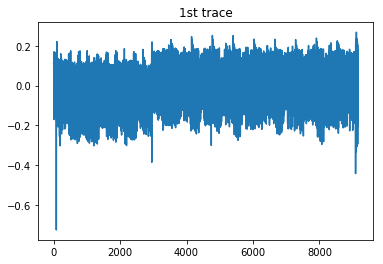

In [3]:
# load trace
f = open('traces.bin', 'rb')
meta = f.read(8)
tnum = struct.unpack('<I', meta[0:4])[0]
tlen = struct.unpack('<I', meta[4:])[0]

ts = np.zeros([tnum, tlen], dtype = np.float32)
for i in tqdm.tqdm(range(tnum)):
    tmp = f.read(tlen * 4)
    ts[i,:] = np.array([struct.unpack('@f', tmp[j:j+4])[0] for j in range(0, tlen*4, 4)])

f.close()

print('number of traces :', tnum)
print('length of trace :', tlen)

plt.title('1st trace')
plt.plot(ts[0])
plt.show()

In [4]:
hw = np.array([bin(n).count("1") for n in range(0, 2**8)])
AES_Sbox = np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])
AES_iSbox = np.array([
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D
])

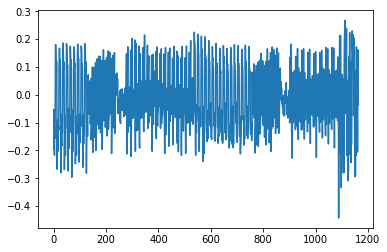

In [5]:
ts = ts[:,8000:]
plt.plot(ts[0])
plt.show()

## Differential Power Analysis

We will attack the target input of 10 round sbox with guessing each 10 round key byte.

First, we attack 1st byte.

For efficiency, we calculate sums of traces on cipher text.
(Actually, there is no need to sum of trace per guess key. We use sums of traces that are precalculated)

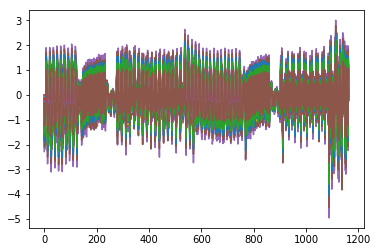

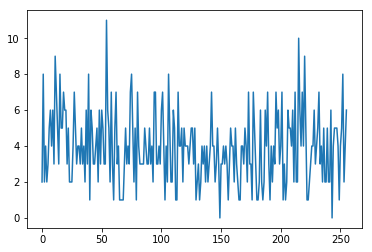

In [6]:
target_byte = 1 - 1

sts_dist = np.zeros((256,1))
sts = np.zeros((256, ts.shape[1]), dtype = np.float32)
for i in range(256):
    ind = np.where(ct[:, target_byte] == i)[0]
    sts_dist[i] = ind.shape[0]
    if sts_dist[i] > 0:
        sts[i,:] = np.sum(ts[ind,:], axis = 0)

plt.plot(sts.T)
plt.show()

plt.plot(sts_dist)
plt.show()

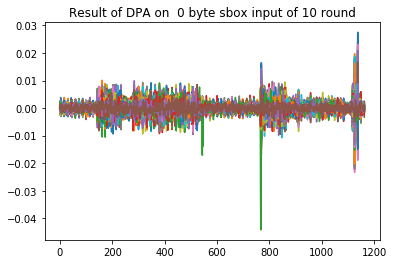

In [7]:
dpat = np.zeros((256, ts.shape[1]))
ms1 = np.zeros((ts.shape[1], 1))
ms2 = np.zeros((ts.shape[1], 1))
for gk in range(256):
    guess2si = hw[AES_iSbox[np.array(range(256)) ^ gk]]
    
    ind1 = np.where(guess2si > 4)[0]
    ind2 = np.where(guess2si < 4)[0]
    
    ms1 = np.sum(sts[ind1,:], axis = 0) / np.sum(sts_dist[ind1])
    ms2 = np.sum(sts[ind2,:], axis = 0) / np.sum(sts_dist[ind2])
    dpat[gk,:] = ms1 - ms2
    
plt.title('Result of DPA on {0:2d} byte sbox input of 10 round'.format(target_byte))
plt.plot(dpat.T)
plt.show()

In [8]:
def guess_key_from_dpat(dpat, targetbyte):
    dpat1 = np.abs(dpat)

    # list of (gk, position of peak, absolute peak)
    dpat2 = np.array([[i, j, dpat1[i,j]] for i,j in zip(range(dpat1.shape[0]),
                                                        dpat1.argmax(axis=1))])

    ind_tmp1 = np.argsort(dpat2[:,2])

    gk = int(dpat2[ind_tmp1[-1], 0])
    peak_1_pos = int(dpat2[ind_tmp1[-1], 1])
    peak_1 = dpat2[ind_tmp1[-1], 2]
    peak_2 = dpat2[ind_tmp1[-2], 2]

    print('%02d Byte guess : %02X (%3d) at %d : 1st peak %f : confidence %f' % (targetbyte+1,
                                                                                gk,
                                                                                gk,
                                                                                peak_1_pos,
                                                                                peak_1,
                                                                                peak_1/peak_2))
    #ind_tmp1.reverse()
    dpat3 = dpat2[ind_tmp1]
    return dpat3

In [9]:
tmp = guess_key_from_dpat(dpat, target_byte)

01 Byte guess : F2 (242) at 767 : 1st peak 0.044233 : confidence 1.606373


Results of DPA on each byte

In [10]:
dpat = np.zeros((16, 256, ts.shape[1]))
ms1 = np.zeros((ts.shape[1], 1))
ms2 = np.zeros((ts.shape[1], 1))
sts_dist = np.zeros((256,1))
sts = np.zeros((256, ts.shape[1]), dtype = np.float32)

gkl = []

for target in range(16):
    sts_dist[:] = 0
    sts[:] = 0
    for i in range(256):
        ind = np.where(ct[:, target] == i)[0]
        sts_dist[i] = ind.shape[0]
        if sts_dist[i] > 0:
            sts[i,:] = np.sum(ts[ind,:], axis = 0)
    
    for gk in range(256):
        guess2si = hw[AES_iSbox[np.array(range(256)) ^ gk]]
        ind1 = np.where(guess2si > 4)[0]
        ind2 = np.where(guess2si < 4)[0]
        ms1 = np.sum(sts[ind1,:], axis = 0) / np.sum(sts_dist[ind1])
        ms2 = np.sum(sts[ind2,:], axis = 0) / np.sum(sts_dist[ind2])
        dpat[target, gk,:] = ms1 - ms2
    gkl.append(guess_key_from_dpat(dpat[target], target)[-1])

01 Byte guess : F2 (242) at 767 : 1st peak 0.044233 : confidence 1.606373
02 Byte guess : 98 (152) at 797 : 1st peak 0.032960 : confidence 1.668968
03 Byte guess : 3F ( 63) at 827 : 1st peak 0.035408 : confidence 1.965565
04 Byte guess : 40 ( 64) at 857 : 1st peak 0.033394 : confidence 1.701870
05 Byte guess : 30 ( 48) at 791 : 1st peak 0.037104 : confidence 2.037471
06 Byte guess : ED (237) at 821 : 1st peak 0.033893 : confidence 1.817915
07 Byte guess : F6 (246) at 851 : 1st peak 0.036232 : confidence 2.095207
08 Byte guess : 33 ( 51) at 785 : 1st peak 0.034471 : confidence 1.775100
09 Byte guess : 04 (  4) at 815 : 1st peak 0.033797 : confidence 1.853871
10 Byte guess : 91 (145) at 726 : 1st peak 0.036827 : confidence 2.117704
11 Byte guess : 10 ( 16) at 779 : 1st peak 0.035870 : confidence 2.002841
12 Byte guess : 3F ( 63) at 809 : 1st peak 0.032951 : confidence 1.706663
13 Byte guess : D1 (209) at 839 : 1st peak 0.035496 : confidence 1.842022
14 Byte guess : B1 (177) at 773 : 1st 

In [11]:
gkl = np.array(gkl)
print('10 round key :', ''.join(['%02X' % int(round(i)) for i in gkl[:,0]]))

10 round key : F2983F4030EDF6330491103FD1B13FA1


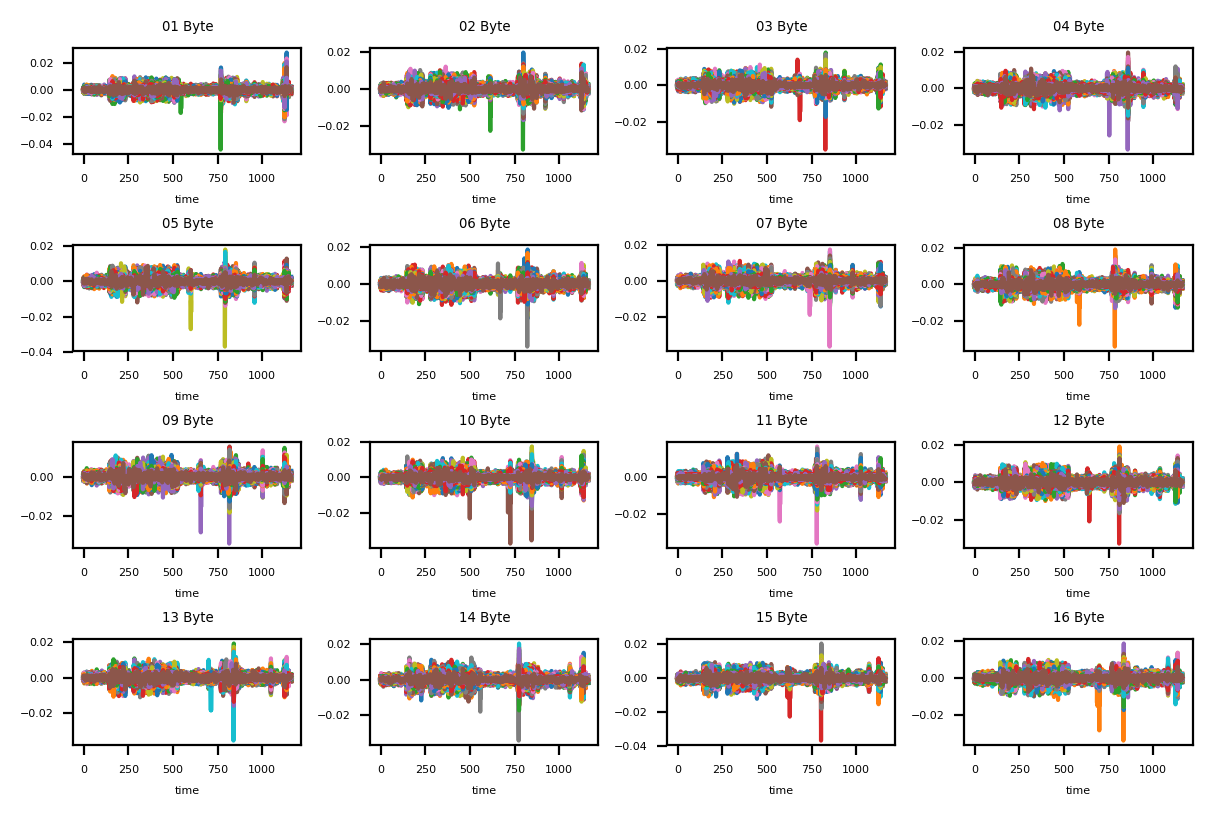

In [12]:
plt.rcParams.update({'font.size': 4})
fig, pos = plt.subplots(nrows=4, ncols=4, dpi= 200)
for i in range(4):
    for j in range(4):
        pos[i,j].plot(dpat[4*i+j].T)
        pos[i,j].set_xlabel('time')
        #pos[i,j].set_ylabel('DPA peak')
        pos[i,j].set_title('%02d Byte' % (4*i+j+1))
plt.tight_layout()

In [13]:
rk10 = np.array([int(i) for i in gkl[:,0]], dtype = np.uint8)
rk1 = np.zeros((16,), dtype=np.uint8)
rk2 = rk10
rcon = np.array([0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1B, 0x36])

for i in range(10):
    rk1[12:16] = np.bitwise_xor(rk2[ 8:12], rk2[12:16])
    rk1[ 8:12] = np.bitwise_xor(rk2[ 4: 8], rk2[ 8:12])
    rk1[ 4: 8] = np.bitwise_xor(rk2[ 0: 4], rk2[ 4: 8])
    rkt = AES_Sbox[rk1[12:16]]
    rkt = np.roll(rkt, -1)
    rkt[0] ^= rcon[9-i]
    rk1[ 0: 4] = np.bitwise_xor(rkt[ 0: 4], rk2[ 0: 4])
    rk2 = rk1

rk0 = rk2
print('master key :', ''.join(['%02X' % i for i in rk2]))

master key : FEDCBA9876543210FEDCBA9876543210
